# Principal Component Analysis Step by Step

In [6]:
# dataset
import numpy as np

np.random.seed(239784) # random seed for consistency

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T

In [12]:
print("class1 " + str(class1_sample))
print("class2 " + str(class2_sample))

class1 [[ 0.39872665  0.78642194  0.20445348  0.167357    0.89445791  0.31710419
  -0.58000538 -0.26303548 -1.46450289  0.48329516 -1.75504823  1.52002744
   0.75323818 -0.00999846  1.35804338 -0.09266182 -0.76652069 -0.58464938
  -1.57557816 -0.91555052]
 [-0.82806542  0.18821736 -1.00203423 -0.35264741 -0.04421996  0.21141062
   1.91195596 -0.29457637 -0.38765023  0.25548507 -0.61148098 -0.94688723
   1.27518212  0.62497457 -0.13422945 -1.20441517 -0.3086457   1.49295001
  -0.66755328  0.54236376]
 [-1.66484864 -0.19116136 -1.18590694  0.26136115 -1.24863714 -0.06230223
  -0.64486486 -1.77986824  0.3271626  -0.60917597  0.22807601 -0.61619178
   1.40890009  0.78163697 -0.81322126 -0.98829059 -0.79304891  1.05190462
   1.58655652 -0.07241862]]
class2 [[ 1.15505467  1.62663703  1.22910744  0.00277653  0.75280052  2.69259145
   1.78144126  1.38173028  2.09323363 -0.25345076  1.3188164   1.80846934
   2.12028095  0.63273762  0.65743204  1.01921042  1.97783858 -0.17153643
   0.35859567  1

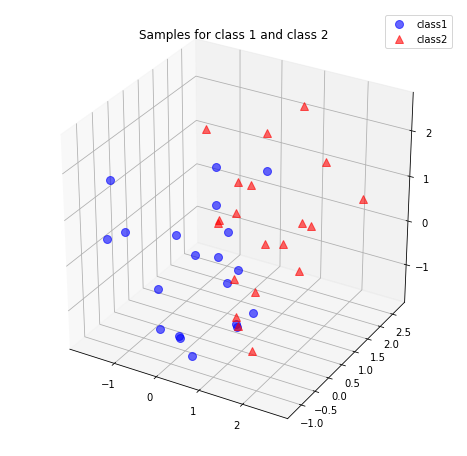

In [20]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, 
        color='blue', label='class1', alpha=0.6)
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, 
        color='red', label='class2', alpha=0.6)
plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')
plt.show()

#### 1. Taking the whole dataset ignoring the class labels

In [23]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)

#### 2. Computing the d-dimensional mean vector

In [22]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.55497194]
 [0.28499276]
 [0.20571318]]


#### 3. a) Computing the Scatter Matrix
$S = \sum_{k=1}^{n}(x_k-m)(x_k-m)^T$ where $m$ is the mean vector, $m=\frac{1}{n}\sum_{k=1}^n x_k$

In [26]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot(
        (all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[43.85444946  4.35720744  1.46432215]
 [ 4.35720744 37.35888877 21.60538033]
 [ 1.46432215 21.60538033 47.2111347 ]]


#### 3. b) Computing the Covariance Matrix (alternatively to the scatter matrix)

Alternatively, instead of calculating the scatter matrix, we could also calculate the covariance matrix. The equations for the covariance matrix and scatter matrix are very similar, the only difference is, that we use the scaling factor $\frac{1}{N−1}$

In [28]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[1.12447306 0.11172327 0.03754672]
 [0.11172327 0.95792022 0.55398411]
 [0.03754672 0.55398411 1.21054192]]


#### 4. Computing eigenvectors and corresponding eigenvalues

In [29]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'

    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')

Eigenvector 1: 
[[0.17955335]
 [0.62118569]
 [0.76281645]]
Eigenvalue 1 from scatter matrix: 65.14975832516981
Eigenvalue 1 from covariance matrix: 1.6705066237223023
Scaling factor:  39.000000000000014
----------------------------------------
Eigenvector 2: 
[[ 0.97814992]
 [-0.03012593]
 [-0.20570649]]
Eigenvalue 2 from scatter matrix: 43.41230301585817
Eigenvalue 2 from covariance matrix: 1.1131359747655931
Scaling factor:  39.000000000000036
----------------------------------------
Eigenvector 3: 
[[ 0.10480137]
 [-0.78308413]
 [ 0.61302195]]
Eigenvalue 3 from scatter matrix: 19.862411583907498
Eigenvalue 3 from covariance matrix: 0.5092926047155769
Scaling factor:  39.0
----------------------------------------


Populating the interactive namespace from numpy and matplotlib


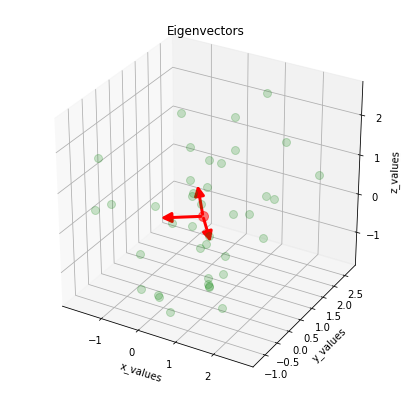

In [30]:
# just to satisfy our own curiosity, it plot the eigenvectors
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

#### 5. Sorting the eigenvectors by decreasing eigenvalues

oughly speaking, the eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data, and those are the ones we want to drop. The common approach is to rank the eigenvectors from highest to lowest corresponding eigenvalue and choose the top k eigenvectors.

In [32]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

65.14975832516981
43.41230301585817
19.862411583907498


#### 6. Choosin k eigenvectors with the largest eigen values

For our simple example, where we are reducing a 3-dimensional feature space to a 2-dimensional feature subspace, we are combining the two eigenvectors with the highest eigenvalues to construct our $d\times k$-dimensional eigenvector matrix $W$.

In [45]:
matrix_highestEigenvectors = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix highest eigenvectors:\n', matrix_higherEigenvectors)

matrix_lowestEigenvectors = np.hstack((eig_pairs[1][1].reshape(3,1), eig_pairs[2][1].reshape(3,1)))
print('Matrix lowest eigenvectors:\n', matrix_lowestEigenvectors)

Matrix highest eigenvectors:
 [[ 0.17955335  0.97814992]
 [ 0.62118569 -0.03012593]
 [ 0.76281645 -0.20570649]]
Matrix lowest eigenvectors:
 [[ 0.97814992  0.10480137]
 [-0.03012593 -0.78308413]
 [-0.20570649  0.61302195]]


#### 7. Transoforming the samples onto the new subspace

Compute the new space via the equation $y=W^T\times x$

In [46]:
transformed_1 = matrix_highestEigenvectors.T.dot(all_samples)
transformed_2 = matrix_lowestEigenvectors.T.dot(all_samples)

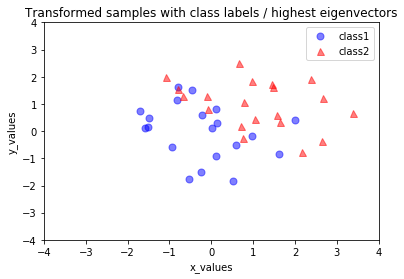

In [47]:
plt.plot(transformed_1[0,0:20], transformed_1[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed_1[0,20:40], transformed_1[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels / highest eigenvectors')

plt.show()

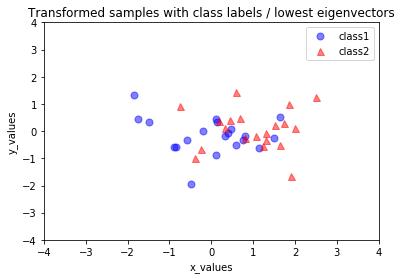

In [48]:
plt.plot(transformed_2[0,0:20], transformed_2[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed_2[0,20:40], transformed_2[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels / lowest eigenvectors')

plt.show()